In [1]:
import tensorflow as tf

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [33]:
from tensorflow.keras import Sequential

In [34]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [35]:
from keras.layers.convolutional import MaxPooling2D

Init The CNN Model

In [36]:
cnn_model = Sequential()

Add Convolution Layer

In [37]:
conv_layer = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1),
                    padding = "valid", activation = "relu", input_shape = (64, 64, 3))

In [38]:
cnn_model.add(conv_layer)

Add Max Pool Layer

In [39]:
pool_layer = MaxPooling2D(pool_size = (2, 2))

In [40]:
cnn_model.add(pool_layer)

Add Flatten Layer

In [41]:
flatten_layer = Flatten()

In [42]:
cnn_model.add(flatten_layer)

Add Hidden / FC layer

In [43]:
#units -- no of neurons in hidden Layer
#kernel - -- weights -- kernel_initializer -- strategy to init the weights
#activation --- the activation funtion for this Layer

fc_layer = Dense(units = 200, kernel_initializer = "random_uniform", activation = "relu", bias_initializer = "random_uniform")

In [44]:
cnn_model.add(fc_layer)

Add Output Layer

In [45]:
op_layer = Dense(units = 1, activation = "sigmoid", kernel_initializer = "random_uniform",  bias_initializer = "random_uniform")

In [46]:
cnn_model.add(op_layer)

In [47]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_2 (Dense)             (None, 200)               6150600   
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 6,151,697
Trainable params: 6,151,697
Non-trainable params: 0
____________________________________________

In [48]:
from  tensorflow.keras.utils import plot_model

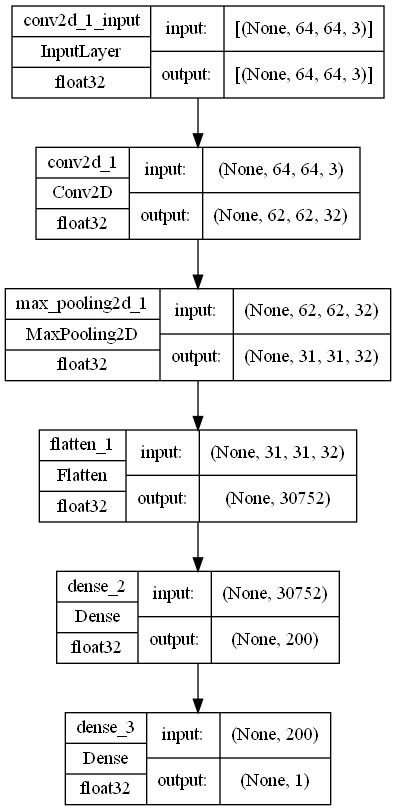

In [49]:
plot_model(cnn_model, show_shapes = True, show_dtype = True)

Compile The model

In [50]:
from tensorflow.keras.optimizers import Adam

In [51]:
adam_o = Adam(learning_rate = 0.001)

In [52]:
cnn_model.compile(loss = "binary_crossentropy", optimizer = adam_o, metrics = ["accuracy"])

Image Data Generator 

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
import random

In [55]:
train_gen = ImageDataGenerator(rotation_range = random.randint(0, 30), 
                               shear_range = random.randint(0, 1000)/100,
                               zoom_range = [0, 3],
                               horizontal_flip = True,
                               vertical_flip = True,
                               rescale = 1.0/255)

In [56]:
test_gen = ImageDataGenerator(rescale = 1.0/255)

In [57]:
#path
X_train = train_gen.flow_from_directory(r"dataset/training_set", target_size = (64, 64), color_mode = 'rgb',
                             class_mode = "binary", batch_size = 32, shuffle = True,)

Found 8000 images belonging to 2 classes.


In [58]:
X_train

In [59]:
X_test = test_gen.flow_from_directory(r"dataset/test_set", target_size = (64, 64), color_mode = 'rgb',
                             class_mode = "binary", batch_size = 32, shuffle = False,)

Found 2000 images belonging to 2 classes.


In [60]:
 X_train.class_indices

{'cats': 0, 'dogs': 1}

In [61]:
8000/32

250.0

In [62]:
8000/32

250.0

In [63]:
 X_train.class_indices

{'cats': 0, 'dogs': 1}

In [64]:
8000/32

250.0

In [65]:
import matplotlib.pyplot as plt